In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
egitimVeri=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta14/telefonveriseti/train.csv")
#testVeri=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta14/telefonveriseti/train.csv")

In [3]:
label_encoder=LabelEncoder().fit(egitimVeri.price_range)
labels=label_encoder.transform(egitimVeri.price_range)
classes=list(label_encoder.classes_)

In [4]:
#Eğitim ve test verileri gereksiz bilgilerden arındırılır 
egitimVeri = egitimVeri.drop(["price_range"],axis=1) 
nb_features = 20
nb_classes = len(classes)
print(egitimVeri)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [5]:
#Verilerin standartlaştırılması 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(egitimVeri.values)
eğitimVeri = scaler.transform(egitimVeri.values) 

In [6]:
#Eğitim ve doğrulama verilerinin belirlenmesi 
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(egitimVeri, labels, test_size = 0.2) 

In [7]:
#Çıktı değerlerinin kategorileştirilmesi 
from tensorflow.keras.utils import to_categorical 
y_train= to_categorical(y_train) 
y_valid = to_categorical(y_valid)

print(X_train.size)
print(" --------")
print(X_valid.size)
print("----")
print(y_train.size)
print("----")
print(y_valid.size)




# 4*7000=28000    => 2000*14
# 4*3000=12000    => 2000*6

32000
 --------
8000
----
6400
----
1600


In [8]:
#Girdi verilerinin yeniden boyutlandırılması 

X_train = np.array(X_train).reshape(1600,20,1)
X_valid = np.array(X_valid).reshape(400,20,1)


In [9]:
#Modelin oluşturulması 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout ,Conv1D
from tensorflow.keras.layers import MaxPooling1D, Flatten, LSTM, BatchNormalization 

model = Sequential() 
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(LSTM(512))
model.add(Activation("relu"))
model.add(BatchNormalization()) 
model.add((Flatten()))
model.add(Dropout (0.15)) 
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense (nb_classes, activation="softmax")) 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 512)           1024      
                                                                 
 activation (Activation)     (None, 20, 512)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 256)           131328    
                                                                 
 activation_1 (Activation)   (None, 10, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 256)           0         
 1D)                                                    

In [ ]:
#Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics=["accuracy"]) 
#Modelin eğitilmesi 
score = model.fit(X_train, y_train, epochs = 150, validation_data=(X_valid,y_valid))

Epoch 1/150
50/50 [==============================] - 8s 119ms/step - loss: 1.4890 - accuracy: 0.2450 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 2/150
50/50 [==============================] - 6s 113ms/step - loss: 1.4006 - accuracy: 0.2587 - val_loss: 1.3855 - val_accuracy: 0.2500
Epoch 3/150
50/50 [==============================] - 6s 126ms/step - loss: 1.3959 - accuracy: 0.2419 - val_loss: 1.3851 - val_accuracy: 0.2625
Epoch 4/150
50/50 [==============================] - 6s 121ms/step - loss: 1.3952 - accuracy: 0.2525 - val_loss: 1.3891 - val_accuracy: 0.2500
Epoch 5/150
50/50 [==============================] - 6s 130ms/step - loss: 1.3903 - accuracy: 0.2669 - val_loss: 1.3877 - val_accuracy: 0.2500
Epoch 6/150
50/50 [==============================] - 6s 126ms/step - loss: 1.3899 - accuracy: 0.2606 - val_loss: 1.3889 - val_accuracy: 0.2500
Epoch 7/150
50/50 [==============================] - 6s 119ms/step - loss: 1.3898 - accuracy: 0.2500 - val_loss: 1.3884 - val_accuracy: 0.2500

In [11]:
print(("Ortalama Doğrulama Kaybı:", np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı: ", np.mean(model.history.history["val_accuracy"]))) 

('Ortalama Doğrulama Kaybı:', 1.9604300645987194)
('Ortalama Doğrulama Başarımı: ', 0.5305000002185504)


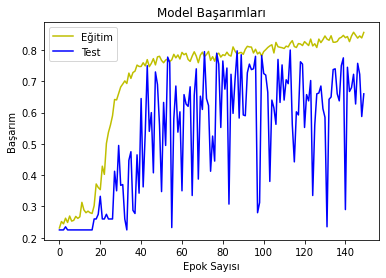

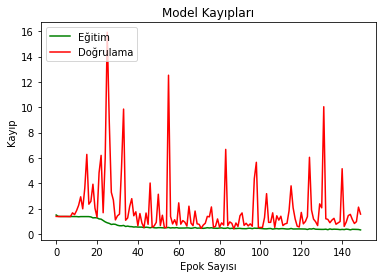

In [12]:
#Eğitim ve doğrulama değerlerinin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"],color="y") 
plt.plot(model.history.history["val_accuracy"],color="b") 
plt.title("Model Başarımları") 
plt.ylabel("Başarım") 
plt.xlabel("Epok Sayısı") 
plt.legend(["Eğitim","Test"], loc="upper left") 
plt.show() 

plt.plot(model.history.history["loss"],color="g")
plt.plot(model.history.history["val_loss"],color="r") 
plt.title("Model Kayıpları") 
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı") 
plt.legend (["Eğitim","Doğrulama"], loc="upper left")
plt.show() 